In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential  #모델a 만들기
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM , BatchNormalization, Activation #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy, mean_squared_error
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model, Model
from keras.utils.np_utils import to_categorical #일종의 원핫인코딩. 정답에 대한 내용들을 숫자로 바꾸겠다.

In [ ]:
#배치 정규화
'''
BatchNormalization()
axis=-1,
momentum=0.99,
epsilon=0.001, 
center=True, 
scale=True, 
beta_initializer='zeros', 
gamma_initializer='ones',
moving_mean_initializer='zeros', 
moving_variance_initializer='ones',
beta_regularizer=None,
gamma_regularizer=None, 
beta_constraint=None, 
gamma_constraint=None
'''

컨볼루션을 쓰지 않고 배치 정규화, 드롭아웃을 이용해보려 한다

In [3]:
(X_data,y_data), (tt_x, tt_y) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_data.shape, tt_x.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
#shape는 튜플 형태로 나오므로 인덱싱이 가능
X_data.shape[0]

60000

In [9]:
t_X_data = X_data.reshape(X_data.shape[0], -1)
t_tt_x = tt_x.reshape(tt_x.shape[0], -1)

In [21]:
#end_x, end_y는 쓰지 않을 데이터. 나눠서 X와 Y만 쓰겠다. 70퍼센트만 사용하겠다는 뜻
X1,end_x,Y1,end_y=train_test_split(X_data, y_data, test_size=0.3, stratify=y_data) 
#stratify는 정답 비율을 조정해 생략되는 y값을 줄이려고 하는 것

In [23]:
X,end_x,Y,end_y=train_test_split(X_data, y_data, test_size=0.3, stratify=y_data) 

In [15]:
#각각의 정답값의 비율
np.unique(y_data, return_counts=True)[1]/len(y_data) * 100

array([ 9.87166667, 11.23666667,  9.93      , 10.21833333,  9.73666667,
        9.035     ,  9.86333333, 10.44166667,  9.75166667,  9.915     ])

In [17]:
X.shape, Y.shape

((42000, 28, 28), (42000,))

In [20]:
np.unique(Y, return_counts = True)[1] / len(Y) * 100

array([ 9.80714286, 11.32380952, 10.02619048, 10.3547619 ,  9.56428571,
        8.90238095,  9.79047619, 10.55      ,  9.79047619,  9.89047619])

In [22]:
np.unique(Y1, return_counts = True)[1] / len(Y1) * 100
#train_test_split을 하며 stratify를 원래 있던 y_data의 비율로 맞춰주어 y_data의 정답 비율을 거의 그대로 가지고 있다.

array([ 9.87142857, 11.23571429,  9.93095238, 10.21904762,  9.73571429,
        9.03571429,  9.86428571, 10.44047619,  9.75238095,  9.91428571])

In [24]:
X.shape, Y.shape

((42000, 28, 28), (42000,))

In [25]:
X, _, Y, _=train_test_split(X_data, y_data, test_size=0.7, stratify=y_data) 

In [26]:
X.shape, Y.shape

((18000, 28, 28), (18000,))

In [27]:
t_Y = to_categorical(Y)

In [28]:
t_Y.shape

(18000, 10)

In [29]:
t_tt_y = to_categorical(tt_y)

In [30]:
t_tt_y.shape

(10000, 10)

다시 정리

In [53]:
#데이터 로드
(X_data,y_data), (tt_x, tt_y) = keras.datasets.mnist.load_data()

In [44]:
X_data.sum()

1567298545

In [54]:
#차원 바꾸기. 튜플로 나오는 shape의 인덱싱을 이용
t_X_data = X_data.reshape(X_data.shape[0], -1)
t_tt_x = tt_x.reshape(tt_x.shape[0], -1)

In [55]:
#데이터 수 줄이기(30퍼), 정답 비율 유지하며
X,_,Y,_ = train_test_split(t_X_data, y_data, test_size = 0.7, stratify = y_data, random_state = 42)

In [56]:
#정답을 범주화
t_Y = to_categorical(Y)
t_tt_y = to_categorical(tt_y)

In [57]:
#차원 확인하기
X.shape, t_tt_x.shape, t_Y.shape, t_tt_y.shape

((18000, 784), (10000, 784), (18000, 10), (10000, 10))

In [58]:
m = Sequential()

In [59]:
m.add(Dense(50, input_shape=(784,)))
m.add(Activation('sigmoid'))
m.add(Dense(50))
m.add(Activation('sigmoid'))
m.add(Dense(50))
m.add(Activation('sigmoid'))
m.add(Dense(50))
m.add(Activation('sigmoid'))
m.add(Dense(10))
m.add(Activation('softmax'))
sgd = SGD(learning_rate=0.001)
m.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) #학습률을 직접 설정한 옵티마이저를 쓴다

In [61]:
hy1 = m.fit(X, t_Y, validation_split=0.3, epochs=100, verbose=2) 
#verbose는 시각화에 관한거?
#0이면 텍스트 내용이 나오지 않는다.
#직접 볼 때는 에포크 5 정도로 모델이 잘 만들어졌는지 확인하고 싶을 때
#기본값은 1, 수치만 보여주는건 2

Epoch 1/100
394/394 - 1s - loss: 2.3002 - acc: 0.1113 - val_loss: 2.2999 - val_acc: 0.1148 - 915ms/epoch - 2ms/step
Epoch 2/100
394/394 - 1s - loss: 2.2999 - acc: 0.1113 - val_loss: 2.2997 - val_acc: 0.1148 - 920ms/epoch - 2ms/step
Epoch 3/100
394/394 - 1s - loss: 2.2997 - acc: 0.1113 - val_loss: 2.2995 - val_acc: 0.1148 - 792ms/epoch - 2ms/step
Epoch 4/100
394/394 - 1s - loss: 2.2996 - acc: 0.1113 - val_loss: 2.2994 - val_acc: 0.1148 - 792ms/epoch - 2ms/step
Epoch 5/100
394/394 - 1s - loss: 2.2994 - acc: 0.1113 - val_loss: 2.2992 - val_acc: 0.1148 - 941ms/epoch - 2ms/step
Epoch 6/100
394/394 - 1s - loss: 2.2993 - acc: 0.1113 - val_loss: 2.2990 - val_acc: 0.1148 - 1s/epoch - 3ms/step
Epoch 7/100
394/394 - 1s - loss: 2.2991 - acc: 0.1113 - val_loss: 2.2989 - val_acc: 0.1148 - 1s/epoch - 3ms/step
Epoch 8/100
394/394 - 1s - loss: 2.2989 - acc: 0.1113 - val_loss: 2.2987 - val_acc: 0.1148 - 1s/epoch - 3ms/step
Epoch 9/100
394/394 - 1s - loss: 2.2988 - acc: 0.1113 - val_loss: 2.2986 - val_ac

In [50]:
hy1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

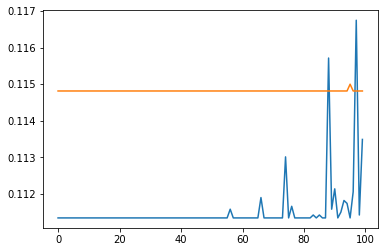

In [62]:
plt.plot(hy1.history['accuracy'])
plt.plot(hy1.history['val_accuracy'])
plt.show()

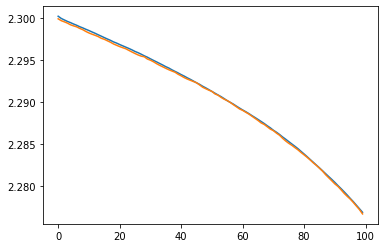

In [63]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.show()

In [64]:
#너무 편향된 데이터를 학습. 기울기가 소실되어서 배치정규화를 해보았다.
m1 = Sequential()
m1.add(Dense(50, input_shape=(784,)))
m1.add(BatchNormalization())
m1.add(Activation('sigmoid'))
m1.add(Dense(50))
m1.add(BatchNormalization())
m1.add(Activation('sigmoid'))
m1.add(Dense(50))
m1.add(BatchNormalization())
m1.add(Activation('sigmoid'))
m1.add(Dense(50))
m1.add(BatchNormalization())
m1.add(Activation('sigmoid'))
m1.add(Dense(10))
m1.add(Activation('softmax'))
sgd = SGD(learning_rate=0.001)
m1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) #학습률을 직접 설정한 옵티마이저를 쓴다

In [65]:
hy2 = m1.fit(X, t_Y, validation_split=0.3, epochs=100, verbose=2) 

Epoch 1/100
394/394 - 3s - loss: 2.2944 - acc: 0.1810 - val_loss: 2.1838 - val_acc: 0.2328 - 3s/epoch - 7ms/step
Epoch 2/100
394/394 - 1s - loss: 2.0086 - acc: 0.3992 - val_loss: 1.8992 - val_acc: 0.5020 - 1s/epoch - 3ms/step
Epoch 3/100
394/394 - 1s - loss: 1.8509 - acc: 0.5331 - val_loss: 1.7698 - val_acc: 0.5920 - 1s/epoch - 3ms/step
Epoch 4/100
394/394 - 2s - loss: 1.7490 - acc: 0.5988 - val_loss: 1.6787 - val_acc: 0.6489 - 2s/epoch - 4ms/step
Epoch 5/100
394/394 - 2s - loss: 1.6682 - acc: 0.6487 - val_loss: 1.6061 - val_acc: 0.6887 - 2s/epoch - 4ms/step
Epoch 6/100
394/394 - 2s - loss: 1.6051 - acc: 0.6769 - val_loss: 1.5435 - val_acc: 0.7170 - 2s/epoch - 5ms/step
Epoch 7/100
394/394 - 1s - loss: 1.5457 - acc: 0.7095 - val_loss: 1.4899 - val_acc: 0.7341 - 1s/epoch - 4ms/step
Epoch 8/100
394/394 - 2s - loss: 1.4978 - acc: 0.7212 - val_loss: 1.4418 - val_acc: 0.7457 - 2s/epoch - 5ms/step
Epoch 9/100
394/394 - 1s - loss: 1.4504 - acc: 0.7340 - val_loss: 1.3957 - val_acc: 0.7574 - 1s/

In [66]:
hy2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

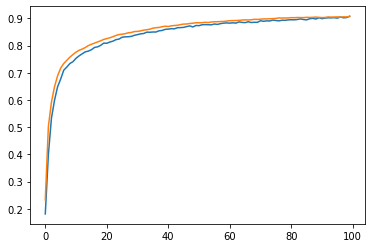

In [67]:
plt.plot(hy2.history['acc'])
plt.plot(hy2.history['val_acc'])
plt.show()

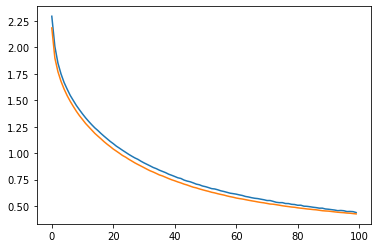

In [68]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()
#배치정규화를 하면 

In [87]:
#activation 다음에 batch normalization을 한 것.
m2 = Sequential()
m2.add(Dense(50, activation='sigmoid', input_shape=(784,)))
m2.add(BatchNormalization())
m2.add(Dense(50, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(50, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(50, activation='sigmoid'))
m2.add(BatchNormalization())
m2.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.001)
m2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
hhy3 = m2.fit(X, t_Y, validation_split=0.3, epochs=100, verbose=2) 

Epoch 1/100
394/394 - 3s - loss: 1.7741 - accuracy: 0.4169 - val_loss: 1.4020 - val_accuracy: 0.5941 - 3s/epoch - 7ms/step
Epoch 2/100
394/394 - 1s - loss: 1.0941 - accuracy: 0.6569 - val_loss: 0.9413 - val_accuracy: 0.7124 - 1s/epoch - 3ms/step
Epoch 3/100
394/394 - 1s - loss: 0.8810 - accuracy: 0.7375 - val_loss: 0.8026 - val_accuracy: 0.7635 - 1s/epoch - 3ms/step
Epoch 4/100
394/394 - 1s - loss: 0.7684 - accuracy: 0.7753 - val_loss: 0.7122 - val_accuracy: 0.7907 - 1s/epoch - 3ms/step
Epoch 5/100
394/394 - 1s - loss: 0.6938 - accuracy: 0.7967 - val_loss: 0.6317 - val_accuracy: 0.8107 - 1s/epoch - 3ms/step
Epoch 6/100
394/394 - 1s - loss: 0.6312 - accuracy: 0.8170 - val_loss: 0.5844 - val_accuracy: 0.8256 - 1s/epoch - 3ms/step
Epoch 7/100
394/394 - 1s - loss: 0.5924 - accuracy: 0.8244 - val_loss: 0.5585 - val_accuracy: 0.8350 - 1s/epoch - 3ms/step
Epoch 8/100
394/394 - 1s - loss: 0.5664 - accuracy: 0.8339 - val_loss: 0.5188 - val_accuracy: 0.8491 - 1s/epoch - 3ms/step
Epoch 9/100
394/

In [71]:
hy2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

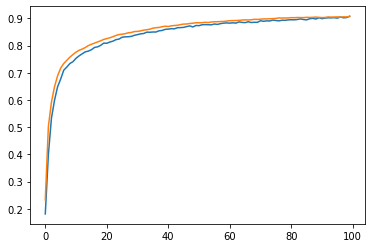

In [72]:
plt.plot(hy2.history['acc'])
plt.plot(hy2.history['val_acc'])
plt.show()
#

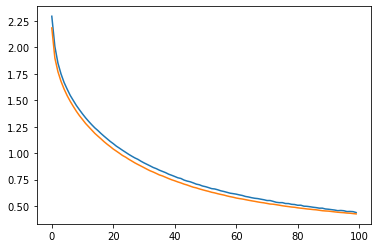

In [73]:
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()

In [74]:
#드롭아웃만 넣어봄
m3 = Sequential()
m3.add(Dense(50, activation='sigmoid', input_shape=(784,)))
m3.add(Dropout(0.2))
m3.add(Dense(50, activation='sigmoid'))
m3.add(Dropout(0.2))
m3.add(Dense(50, activation='sigmoid'))
m3.add(Dropout(0.2))
m3.add(Dense(50, activation='sigmoid'))
m3.add(Dropout(0.2))
m3.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.001)
m3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
hy4 = m3.fit(X, t_Y, validation_split=0.3, epochs=100, verbose=2) 

Epoch 1/100
394/394 - 2s - loss: 2.4282 - accuracy: 0.0992 - val_loss: 2.3450 - val_accuracy: 0.1150 - 2s/epoch - 4ms/step
Epoch 2/100
394/394 - 1s - loss: 2.3819 - accuracy: 0.1038 - val_loss: 2.3160 - val_accuracy: 0.1148 - 1s/epoch - 3ms/step
Epoch 3/100
394/394 - 1s - loss: 2.3640 - accuracy: 0.1022 - val_loss: 2.3061 - val_accuracy: 0.1148 - 888ms/epoch - 2ms/step
Epoch 4/100
394/394 - 1s - loss: 2.3556 - accuracy: 0.1025 - val_loss: 2.3028 - val_accuracy: 0.1148 - 984ms/epoch - 2ms/step
Epoch 5/100
394/394 - 1s - loss: 2.3489 - accuracy: 0.1011 - val_loss: 2.3015 - val_accuracy: 0.1148 - 997ms/epoch - 3ms/step
Epoch 6/100
394/394 - 1s - loss: 2.3531 - accuracy: 0.1029 - val_loss: 2.3009 - val_accuracy: 0.1148 - 946ms/epoch - 2ms/step
Epoch 7/100
394/394 - 2s - loss: 2.3511 - accuracy: 0.0988 - val_loss: 2.3007 - val_accuracy: 0.1148 - 2s/epoch - 4ms/step
Epoch 8/100
394/394 - 1s - loss: 2.3489 - accuracy: 0.1055 - val_loss: 2.3005 - val_accuracy: 0.1148 - 990ms/epoch - 3ms/step
E

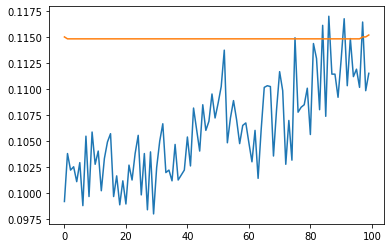

In [78]:
plt.plot(hy4.history['accuracy'])
plt.plot(hy4.history['val_accuracy'])
plt.show()
#

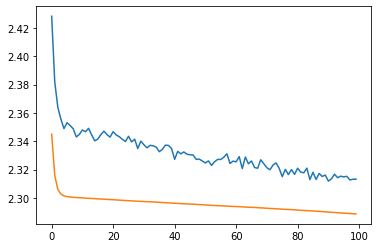

In [79]:
plt.plot(hy4.history['loss'])
plt.plot(hy4.history['val_loss'])
plt.show()

In [80]:
#배치정규화, 드롭아웃
m4 = Sequential()
m4.add(Dense(50, activation='sigmoid', input_shape=(784,)))
m4.add(Dropout(0.2))
m4.add(BatchNormalization())
m4.add(Dense(50, activation='sigmoid'))
m4.add(Dropout(0.2))
m4.add(BatchNormalization())
m4.add(Dense(50, activation='sigmoid'))
m4.add(Dropout(0.2))
m4.add(BatchNormalization())
m4.add(Dense(50, activation='sigmoid'))
m4.add(Dropout(0.2))
m4.add(BatchNormalization())
m4.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.001)
m4.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
hy5 = m4.fit(X, t_Y, validation_split=0.3, epochs=100, verbose=0) 

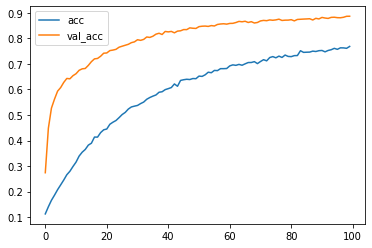

In [85]:
plt.plot(hy5.history['accuracy'])
plt.plot(hy5.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()
#드롭아웃을 했으니 성능은 떨어질 수밖에 없다

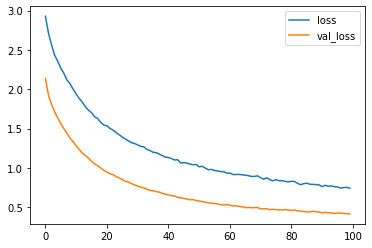

In [86]:
plt.plot(hy5.history['loss'])
plt.plot(hy5.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()